In [1]:
!pip install jupyter_dash

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 42.0 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [2]:
from jupyter_dash import JupyterDash
from dash import dcc, html
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import io
import numpy as np
import base64

import warnings
warnings.filterwarnings('ignore')


**1. Data preperation**

This analysis utilizes a dataset focused on companies within the S&P 500 index, providing insights into the environmental, social, and governance (ESG) performance and risk profiles of these major corporations. The dataset includes several key indicators:

	•	Total ESG Risk Score: Reflects overall ESG performance.
	•	Environmental Risk Score: Assesses environmental impact.
	•	Governance Risk Score: Analyzes governance structure.
	•	Social Risk Score: Evaluates social responsibility.
During data preparation, the dataset is first loaded and cleaned to ensure analysis is based on complete information.

In [3]:
colors = {
    'background': '#F5F5F5',
    'text': '#4A4A4A',
    'forest_green': '#2C5F2D',
    'ocean_blue': '#1D4E89',
    'light_gray_green': '#A4C3A3',
    'light_blue_gray': '#8FAFC0',
    'orange': '#F28C28',
    'lemon_yellow': '#FFD700',
}

df = pd.read_csv('/content/data.csv')
df = df.dropna(subset=['Sector', 'Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'])

**2.Data Distribution**

In [4]:
print(df[['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].describe())

       Total ESG Risk score  Environment Risk Score  Governance Risk Score  \
count            430.000000              430.000000             430.000000   
mean              21.533721                5.739767               6.725116   
std                6.889176                5.092421               2.208085   
min                7.100000                0.000000               3.000000   
25%               16.400000                1.800000               5.300000   
50%               21.050000                4.050000               6.100000   
75%               26.000000                8.950000               7.675000   
max               41.700000               25.000000              19.400000   

       Social Risk Score  
count         430.000000  
mean            9.070465  
std             3.657924  
min             0.800000  
25%             6.700000  
50%             8.900000  
75%            11.200000  
max            22.500000  


In [5]:
fig_sector_pie = px.pie(
    df,
    names='Sector',
    title='Sector Distribution',
    color_discrete_sequence=[colors['forest_green'], colors['ocean_blue'], colors['orange'], colors['lemon_yellow']],
)
fig_sector_pie.update_layout(
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)

fig_esg_hist = px.histogram(
    df,
    x='Total ESG Risk score',
    nbins=20,
    title='Total ESG Risk Score Distribution',
    color_discrete_sequence=[colors['forest_green']],
)
fig_esg_hist.update_layout(
    paper_bgcolor=colors['background'],
    font_color=colors['text'],
    bargap=0.1
)

fig_sector_pie.show()


In [6]:
fig_sector_box = px.box(df, x='Sector', y='Total ESG Risk score',
                        title='Total ESG Risk Score by Sector',
                        color='Sector',
                        color_discrete_sequence=px.colors.qualitative.G10)

fig_sector_box.show()

In [7]:
import plotly.express as px

fig_sector_distribution = px.box(df,
                                  x='Sector',
                                  y='Total ESG Risk score',
                                  color='ESG Risk Level',
                                  title='ESG Risk Level Distribution by Sector',
                                  color_discrete_sequence=[colors['forest_green'], colors['ocean_blue'], colors['orange']])

fig_sector_distribution.update_layout(
    xaxis_title='Sector',
    yaxis_title='Total ESG Risk Score',
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text'],
    xaxis_tickangle=-45
)

fig_sector_distribution.show()

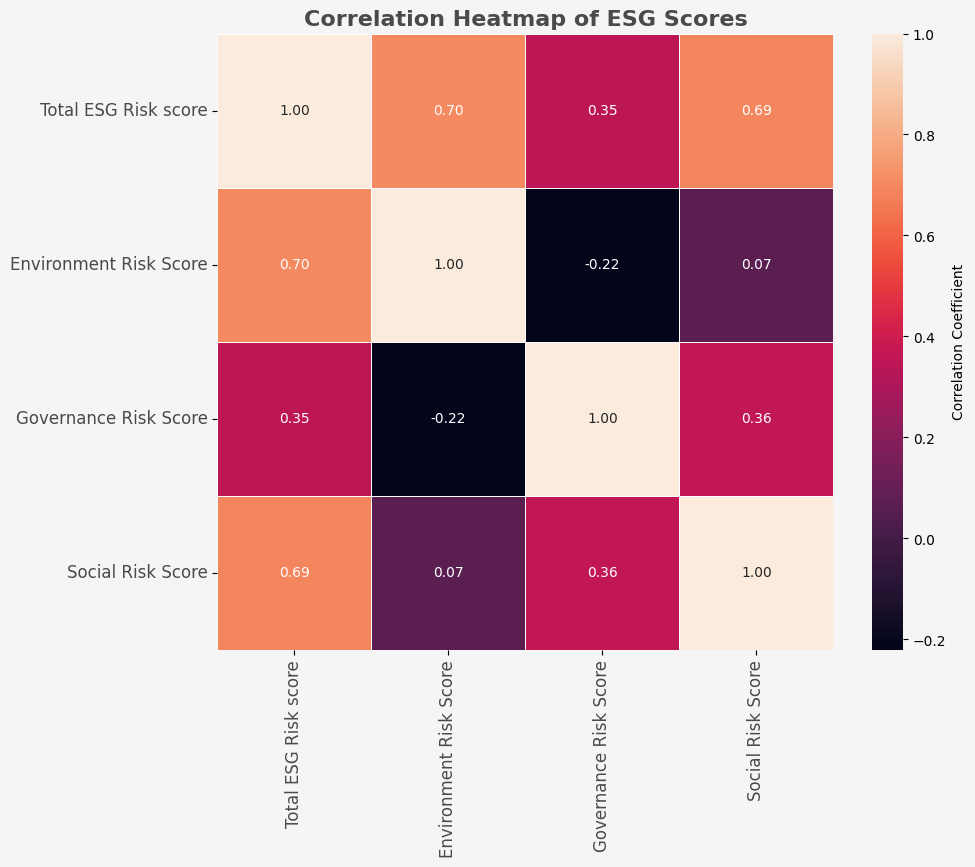

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df[['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8), facecolor='#F5F5F5')

# Create the heatmap
sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            square=True,
            linewidths=0.5,
            linecolor='white',
            cbar_kws={'label': 'Correlation Coefficient'}
            )


plt.title('Correlation Heatmap of ESG Scores', fontsize=16, weight='bold', color='#4A4A4A')  # Title settings
plt.xticks(fontsize=12, color='#4A4A4A')
plt.yticks(fontsize=12, color='#4A4A4A')
plt.show()

In [15]:
import pandas as pd
import plotly.express as px

# Calculate Top 10 and Bottom 10 companies
top_10 = df.nsmallest(10, 'Total ESG Risk score')
bottom_10 = df.nlargest(10, 'Total ESG Risk score')

comparison_df = pd.concat([top_10.assign(Performance='Top'),
                            bottom_10.assign(Performance='Bottom')])


fig_comparison = px.bar(comparison_df,
                        x='Name',
                        y='Total ESG Risk score',
                        color='Performance',
                        title='Total ESG Risk Score: Top 10 vs Bottom 10 Companies',
                        color_discrete_map={'Top': colors['forest_green'], 'Bottom': colors['orange']},
                        text='Total ESG Risk score')
fig_comparison.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text'],
    title_font_color=colors['text'],
    title_x=0.5,
    yaxis_title='Total ESG Risk Score',
    yaxis=dict(tickmode='linear'),
    yaxis_range=[0, comparison_df['Total ESG Risk score'].max() * 1.1])


fig_comparison.for_each_trace(lambda t: t.update(textfont_size=10))  # Set text size on bars


fig_comparison.show()

In [10]:
app = JupyterDash(__name__)

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(children='ESG Score Analysis', style={'textAlign': 'center', 'color': colors['text']}),

    html.Div(
        dcc.Dropdown(
            id='sector-dropdown',
            options=[{'label': sector, 'value': sector} for sector in df['Sector'].unique()],
            value=df['Sector'].unique()[0],
            style={
                'color': colors['text'],
                'width': '300px',
                'margin': '0 auto'
            },
        ),
        style={'textAlign': 'center'}
    ),

    dcc.Graph(id='esg-bar-chart'),

    dcc.Graph(id='esg-3d-scatter-chart'),
])

In [11]:
@app.callback(
    Output('esg-bar-chart', 'figure'),
    Input('sector-dropdown', 'value')
)
def update_bar_graph(selected_sector):
    filtered_df = df[df['Sector'] == selected_sector]

    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=filtered_df['Name'],
        y=filtered_df['Environment Risk Score'],
        name='Environment Score',
        marker_color=colors['forest_green'],
    ))

    fig.add_trace(go.Bar(
        x=filtered_df['Name'],
        y=filtered_df['Governance Risk Score'],
        name='Governance Score',
        marker_color=colors['orange'],
    ))

    fig.add_trace(go.Bar(
        x=filtered_df['Name'],
        y=filtered_df['Social Risk Score'],
        name='Social Score',
        marker_color=colors['ocean_blue'],
    ))

    fig.update_layout(
        title=f'ESG Scores for {selected_sector} Sector',
        xaxis_title='Company',
        yaxis_title='Score',
        barmode='stack',
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font=dict(color=colors['text']),
    )

    return fig

@app.callback(
    Output('esg-3d-scatter-chart', 'figure'),
    Input('sector-dropdown', 'value')
)
def update_3d_scatter_graph(selected_sector):
    filtered_df = df[df['Sector'] == selected_sector]

    if filtered_df.empty:
        return go.Figure()

    fig = px.scatter_3d(
        filtered_df,
        x='Environment Risk Score',
        y='Governance Risk Score',
        z='Social Risk Score',
        color='Total ESG Risk score',
        labels={
            'Environment Risk Score': 'Environment Risk Score',
            'Governance Risk Score': 'Governance Risk Score',
            'Social Risk Score': 'Social Risk Score',
            'Total ESG Risk score': 'Total ESG Risk Score'
        },
        title=f'3D Scatter Plot of ESG Scores for {selected_sector} Sector',
        hover_name='Name'
    )

    fig.update_traces(marker=dict(size=5))
    fig.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font=dict(color=colors['text']),
    )

    return fig

In [12]:
if __name__ == '__main__':
    app.run_server(mode='inline')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>